# Tabular EDA

In [1]:
%%capture

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import LocalOutlierFactor

from scipy.stats import norm
import scipy.stats as st

from IPython.display import display, Markdown, Latex

## Load

In [2]:
data = pd.read_csv('../../data/tabular_appointments.csv')
data['noshow'] = data['No-show'] == 'Yes'
data = data.drop(columns=['No-show'])

## Basic Information

In [3]:
display(data.head())
data.info()
data.describe()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,False
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,False
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,False
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,False
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  noshow          110527 non-null  bool   
dtypes: bool(1), float64(1), int64(8), object(4)
memory usage: 11.1+ MB


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We can see that there are no `null` values in the dataset. However, we can see that some features have invalid values e.g. There are some patients whose `Age` are set to `-1`.

## Distributions

In [4]:
display(Markdown('#### No-Shows'))
print(f'{round(np.mean(data.noshow.values) * 100, 2)}% of our appointments are No-Shows.')

#### No-Shows

20.19% of our appointments are No-Shows.


#### Age

The ages in the dataset range from -1 to 115


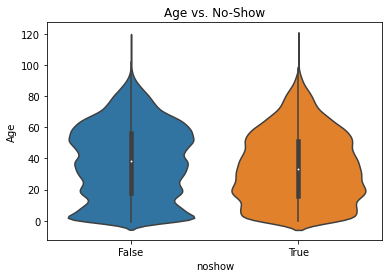

In [5]:
display(Markdown('#### Age'))
print('The ages in the dataset range from %d to %d' % (data.Age.min(), data.Age.max()))

sns.violinplot(x='noshow', y='Age', data=data)
plt.title('Age vs. No-Show');

We can see from the above plot that the distributions of Age vary with No-show.

#### Neighbourhood

We have 81 neighborhoods in the dataset.


//miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


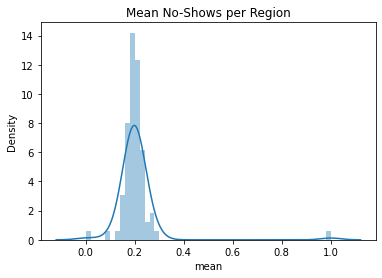

In [7]:
display(Markdown('#### Neighbourhood'))
print('We have %d neighborhoods in the dataset.' % (len(set(data.Neighbourhood.values))))
# Plot the raw number of bookings and the probability of no-shows for each neighborhood
neighbourhood_no_shows = data.groupby('Neighbourhood')['noshow'].agg([np.mean, 'count']).reset_index()
sns.distplot(neighbourhood_no_shows['mean'])
plt.title('Mean No-Shows per Region');

#### Gender

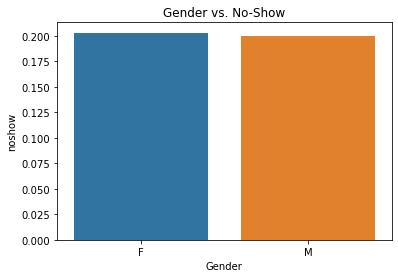

In [9]:
display(Markdown('#### Gender'))
sns.barplot(x='Gender', y='noshow', data=data.groupby('Gender')['noshow'].mean().reset_index())
plt.title('Gender vs. No-Show');

#### Patient ID

We have 62299 patients in the dataset.


//miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


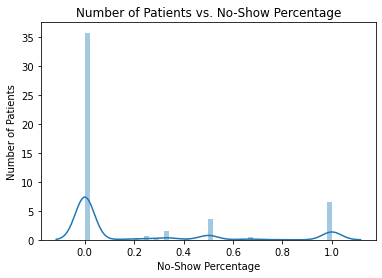

In [11]:
display(Markdown('#### Patient ID'))
print('We have %d patients in the dataset.' % (len(list(set(data.PatientId.values)))))
sns.distplot(data.groupby('PatientId')['noshow'].agg(['mean', 'count']).reset_index()['mean'])
plt.xlabel('No-Show Percentage')
plt.ylabel('Number of Patients')
plt.title('Number of Patients vs. No-Show Percentage');